# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

# Dataset reading

In [2]:
sms=pd.read_csv(r"C:\Users\Kishor\OneDrive\Desktop\internship dataset\spam.csv",encoding='latin-1')
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
sms

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
sms = sms.rename(columns={'v1':'label','v2':'text'})

In [6]:
sms

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploring the data

In [7]:
print('dataste has number of   rows : {} /// columns : {}'.format(sms.shape[0],sms.shape[1]))

dataste has number of   rows : 5572 /// columns : 2


In [8]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# EDA

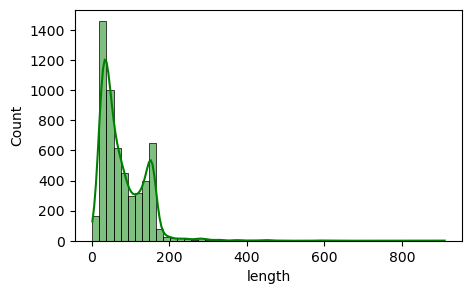

In [11]:
plt.figure(figsize = (5,3))
sns.histplot(sms['length'],bins=50,kde=True,color='green')
plt.show()

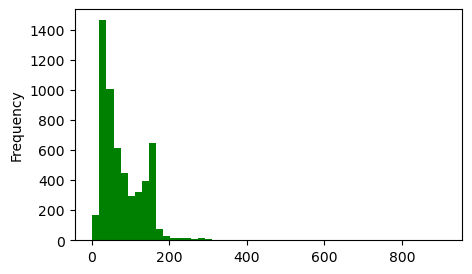

In [12]:
sms['length'].plot(column='length',kind='hist',bins=50,color='green',figsize=(5,3))
plt.show()

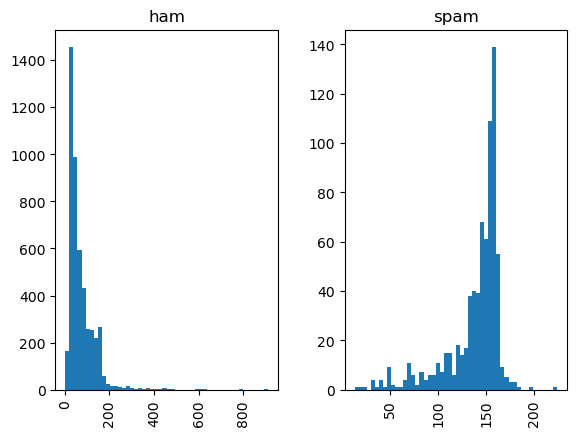

In [13]:
sms.hist(column='length',by='label',bins=50)
plt.show()

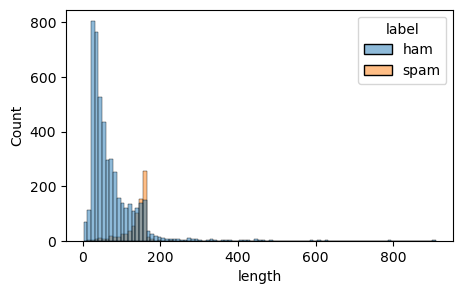

In [14]:
plt.figure(figsize=(5,3))
sns.histplot(x = sms['length'],hue=(sms['label']))
plt.show()

In [15]:
sms['label']=sms['label'].map({'ham':0,'spam':1})

In [16]:
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Implementation of BOW

In [17]:
count=CountVectorizer()
text = count.fit_transform(sms['text'])

# Train Test Split

In [18]:
X=text
y=sms['label']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 8672)
(1115, 8672)
(4457,)
(1115,)


In [21]:
X_train,X_test

(<4457x8672 sparse matrix of type '<class 'numpy.int64'>'
 	with 59357 stored elements in Compressed Sparse Row format>,
 <1115x8672 sparse matrix of type '<class 'numpy.int64'>'
 	with 14559 stored elements in Compressed Sparse Row format>)

# Implementation ML model

# 1.MultinomialNB

In [22]:
naive= MultinomialNB()
naive.fit(X_train,y_train)

y_pred = naive.predict(X_test)

In [23]:
print('accuracy score :',round(accuracy_score(y_pred,y_test),2))
print('precision score :',round(precision_score(y_pred,y_test),2))
print('recall score :',round(recall_score(y_pred,y_test),2))
print('f1 score :',round(f1_score(y_pred,y_test),2))

accuracy score : 0.98
precision score : 0.94
recall score : 0.89
f1 score : 0.92


# 2. MLP classifier

In [24]:
mlp=MLPClassifier()

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

In [25]:
print('accuracy score :',round(accuracy_score(y_pred,y_test),2))
print('precision score :',round(precision_score(y_pred,y_test),2))
print('recall score :',round(recall_score(y_pred,y_test),2))
print('f1 score :',round(f1_score(y_pred,y_test),2))

accuracy score : 0.99
precision score : 0.95
recall score : 1.0
f1 score : 0.97


# Application Of model

In [26]:
def sms_classifier():
    ip=input('type your message :')
    print("="*70)
    count_ip=count.transform([ip])
    op = mlp.predict(count_ip)[0]
    if op==1:
        print('The written message is a spam message')
    else:
        print('The written message is not a spam message')

In [27]:
sms_classifier()

type your message :As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
The written message is not a spam message


In [28]:
sms_classifier()

type your message :England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
The written message is a spam message
